# Best orbital parameters

We explore the 3d-space of the orbital parameters using the intensity profile. For each set of orbital parameters, $K$, $v_\mathrm{rad}$, and $\phi$, we use the ZDI technique to reconstruct the brightness map of the star. Then, we minimize the spot coverage information got from these maps to obtain the best orbital parameters. 

## DATA IN 2004  
- Total of 231 sub-exposures in November. Four of them were discarded of the data.

  \begin{equation*} \chi^2_{\mathrm{aim}} = 0.30 \end{equation*}


In [1]:
# load modules
import numpy as N
import matplotlib.pyplot as P
from scipy.optimize import leastsq
import cmocean as cm

# Read file with informations in each run
amp, phase, vrad, chisq, s, sp_ph, test, cool, hot = N.genfromtxt('data/search1_3d_2004.txt', unpack=True)

# Set global min of spot coverage
vmin = sp_ph.min()

#select data within the conditions:
ic = N.bitwise_and(chisq <= 0.3005, test <= 0.003)
amp = amp[ic]; phase = phase[ic]; vrad = vrad[ic]; chisq = chisq[ic]; s = s[ic]; sp_ph = sp_ph[ic] 
test = test[ic]; cool = cool[ic]; hot = hot[ic]
#we also add another condition for the data (optional):
isp = N.bitwise_and(sp_ph >= 1.00*vmin, sp_ph <= 1.20*vmin)
amp = amp[isp]; phase = phase[isp]; vrad = vrad[isp]; chisq = chisq[isp]; s = s[isp]; sp_ph = sp_ph[isp] 
test = test[isp]; cool = cool[isp]; hot = hot[isp]

## 3d minimization of sp_ph - this more accurate if we work with constant spot and then minimize chisq:
optimize_func = lambda x: x[0]*amp**2 + x[1]*vrad**2 + x[2]*phase**2 + x[3]*amp*vrad + x[4]*amp*phase \
                         + x[5]*vrad*phase + x[6]*amp + x[7]*vrad + x[8]*phase + x[9] - sp_ph
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f, g, h, i, j = coef
A = 2.*a*f - d*e; B =  2.*c*d - e*f
C = 4.*a*c - e**2; D =  d*f - 2.*b*e
E = 2.*c*g - e*i; F =  g*f - h*e
G = d**2 - 4.*a*b; H =  d*g - 2.*a*h
I = h*e - d*i; J =  f**2 - 4.*b*c
K =  f*h - 2.*b*i; L =  g*f - d*i
alpha_X = -D/J; beta_X = -(d+f*alpha_X)/(2*b)
alpha_Y = -B/C; beta_Y = -(f+e*alpha_Y)/(2*c)
alpha_Z =  A/G; beta_Z = -(e+d*alpha_Z)/(2*a)

# Best values (or the center of the paraboloid):
X_min = (D*E - B*F)/(A*B - C*D); Y_min = (A*I - B*H)/(A*D + B*G); Z_min = (D*L - A*K)/(B*D + A*J)

# 'Error  bars' - they are fake error bars because we are not minimizing chisq!: 
dX = 1./N.sqrt(2*a + 2*d*beta_X + 2*e*alpha_X + 2*b*beta_X**2 + 2*f*alpha_X*beta_X + 2*c*alpha_X**2)
dY = 1./N.sqrt(2*b + 2*f*beta_Y + 2*d*alpha_Y + 2*c*beta_Y**2 + 2*e*alpha_Y*beta_Y + 2*a*alpha_Y**2)
dZ = 1./N.sqrt(2*c + 2*e*beta_Z + 2*f*alpha_Z + 2*a*beta_Z**2 + 2*d*alpha_Z*beta_Z + 2*b*alpha_Z**2)

print(dX, dY, dZ)
# Now we need to find the number of points to find the error bar
cycle, vr, snI, I, cycleV, vrV, snV, V = rstokes('data/v471tau_04.ss_search1_3d')
count=0
for i in range(len(cycle)):
    count += I[i].shape[0]
print(count)
dX /= N.sqrt(count)
dY /= N.sqrt(count)
dZ /= N.sqrt(count)
print(dX, dY, dZ)



8.406086240763655 3.1528338364689863 0.008690676689560532
27746
0.05046539190921404 0.01892783283741138 5.217391215523626e-05


### results form 3d-fit in 2004:

The "error bar" are expressed below. We used the eq. in Logithan's thesis dividing by the correspondent number of points used in total.

In [2]:
print(r'K = %3.2f, V_rad = %2.2f, and phi = %1.5f' %(X_min, Y_min, Z_min))
print(r'dK = %1.2f, dV_rad = %1.2f, and dphi = %1.5f' %(dX, dY, dZ))

K = 149.11, V_rad = 34.57, and phi = -0.00258
dK = 0.05, dV_rad = 0.02, and dphi = 0.00005


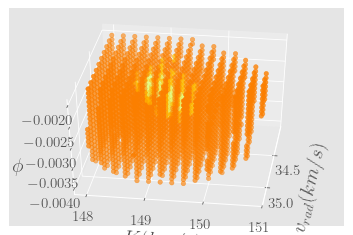

In [3]:
#%matplotlib notebook
import matplotlib.font_manager
from mpl_toolkits.mplot3d import Axes3D
P.rcParams['font.family'] = 'arial'
fig = P.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('Wistia', 3)
ax.scatter(vrad, amp, phase, c=sp_ph, vmin=vmin, vmax=1.02*vmin,cmap=cmap)
P.yticks([148.0, 149., 150., 151.])
P.xticks([34.5, 35.])
P.ylabel(r'$K (km/s)$', fontsize=20, labelpad=12)
P.xlabel(r'$v_{rad} (km/s)$', fontsize=20, labelpad=12)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\phi$', fontsize=20, rotation = 0, labelpad = 12)
ax.tick_params(axis='both', which='major', labelsize=15, direction='inout')
ax.view_init(elev=40., azim=8.)

---
---
###    2d planes passing through best values
    1) fixed semi-amplitude: K = 149.2 -- this value differs in 0.1km/s from the best value!! As we will see, it matches the value found in 2005.

In [4]:
# fixed semi-amplitude
ia = amp == 149.2
ypha = N.unique(phase[ia])
xvrad = N.unique(vrad[ia])

# create a mesh and create new matrix with mesh's shape
x, y = N.meshgrid(xvrad, ypha)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[ia].shape[0]):
    indx = N.bitwise_and(y == phase[ia][i], x == vrad[ia][i])
    m_z[indx] = sp_ph[ia][i]
    
mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*vrad[ia]**2 + x[1]*vrad[ia] + x[2]*phase[ia]**2 + x[3]*phase[ia] \
                            + x[4]*vrad[ia]*phase[ia] + x[5] - sp_ph[ia]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('V_rad = %3.1f and phi = %1.4f' %(best_x, best_y))

del(xvrad, ypha, optimize_func, coef, indx)

Positions of the center in this plane:
V_rad = 34.6 and phi = -0.0026


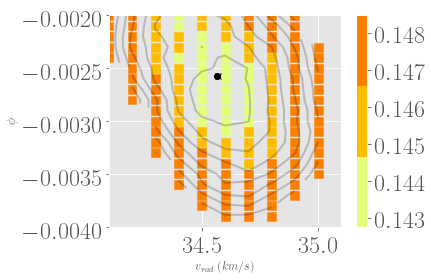

In [5]:
P.scatter(x,y,c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.04*vmin)
P.colorbar()
#P.contourf(x, y, z, cmap=cmap, alpha=.7)
P.contour(x, y, z, colors='k', alpha=0.2)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(Y_min, Z_min, 'o', color='k')
P.xlabel(r'$v_{rad}\; (km/s)$')
P.ylabel(r'$\phi$')
P.tight_layout()

---
    2) fixed radial velocity: V_rad = 34.6

In [6]:
# fixed vrad
iv = vrad == 34.6

ypha = N.unique(phase[iv])
xamp = N.unique(amp[iv])

# create a mesh and create new matrix with mesh's shape
y, x = N.meshgrid(ypha, xamp)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[iv].shape[0]):
    indx = N.bitwise_and(y == phase[iv][i], x == amp[iv][i])
    m_z[indx] = sp_ph[iv][i]

mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)    
# find center in the 2d-plane
optimize_func = lambda x: x[0]*amp[iv]**2 + x[1]*amp[iv] + x[2]*phase[iv]**2 + x[3]*phase[iv] \
                            + x[4]*amp[iv]*phase[iv] + x[5] - sp_ph[iv]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('K = %3.1f and phi = %1.4f' %(best_x, best_y))

Positions of the center in this plane:
K = 149.1 and phi = -0.0026


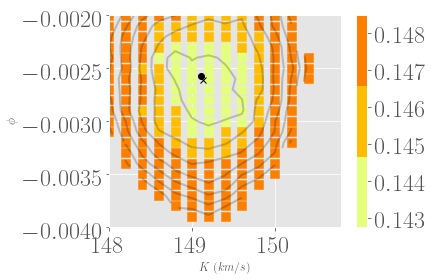

In [7]:
P.scatter(x, y, c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.04*vmin)
P.colorbar()
#P.contourf(x, y, z, cmap=cmap, alpha=.7)
P.contour(x, y, z, colors='k', alpha=0.2)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(X_min, Z_min, 'o', color='k')
#P.errorbar(X_min, Z_min, xerr=dX, yerr=dZ, fmt='-o', color='k')
P.xlabel(r'$K\; (km/s)$')
P.ylabel(r'$\phi$')
P.tight_layout()

---
    3) fixed phase: phi = -0.0026

In [8]:
# fixed phase
ip = phase == -0.0026
yvrad = N.unique(vrad[ip])
xamp = N.unique(amp[ip])

# create a mesh and create new matrix with mesh's shape
x, y = N.meshgrid(xamp, yvrad)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[ip].shape[0]):
    indx = N.bitwise_and(x == amp[ip][i], y == vrad[ip][i])
    m_z[indx] = sp_ph[ip][i]
    
mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*amp[ip]**2 + x[1]*amp[ip] + x[2]*vrad[ip]**2 + x[3]*vrad[ip] \
                        + x[4]*amp[ip]*vrad[ip] + x[5] - sp_ph[ip]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('K = %3.1f and V_rad = %1.1f' %(best_x, best_y))

del(yvrad, xamp, optimize_func, coef, indx)

Positions of the center in this plane:
K = 149.1 and V_rad = 34.6


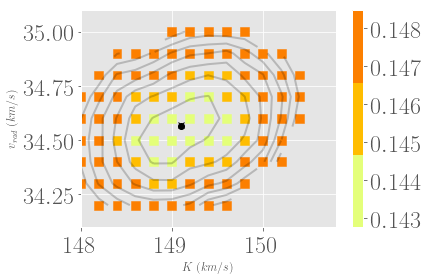

In [9]:
P.scatter(x, y, c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.04*vmin)
P.colorbar()
#P.contourf(x, y, z, cmap=cmap, alpha=.7)
P.contour(x, y, z, colors='k', alpha=0.2)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(X_min, Y_min, 'o', color='k')
P.xlabel(r'$K\; (km/s)$')
P.ylabel(r'$v_{rad}\; (km/s)$')
P.tight_layout()

## DATA IN 2005  
  \begin{equation*} \chi^2_{\mathrm{aim}} = 0.32 \end{equation*}

We repeat the same procedure showed before, but for 2005.

In [10]:
# load modules
import numpy as N
import matplotlib.pyplot as P
from scipy.optimize import leastsq
import cmocean as cm

# Read file with informations in each run
amp, phase, vrad, chisq, s, sp_ph, test, cool, hot = N.genfromtxt('/Users/bzaire/lsd/spectra/v471tau/search05/results_final.txt', unpack=True)

# Set global min of spot coverage
vmin = sp_ph.min()

#select data within the conditions:
ic = N.bitwise_and(chisq <= 0.3205, test <= 0.003)
amp = amp[ic]; phase = phase[ic]; vrad = vrad[ic]; chisq = chisq[ic]; s = s[ic]
sp_ph = sp_ph[ic]; test = test[ic]; cool = cool[ic]; hot = hot[ic]
#we also add another condition for the data (optional):
isp = N.bitwise_and(sp_ph >= 1.00*vmin, sp_ph <= 1.20*vmin)
amp = amp[isp]; phase = phase[isp]; vrad = vrad[isp]; chisq = chisq[isp]; s = s[isp] 
sp_ph = sp_ph[isp]; test = test[isp]; cool = cool[isp]; hot = hot[isp]

## 3d minimization of sp_ph - this more accurate if we work with constant spot and then minimize chisq:
optimize_func = lambda x: x[0]*amp**2 + x[1]*vrad**2 + x[2]*phase**2 + x[3]*amp*vrad + x[4]*amp*phase \
                        + x[5]*vrad*phase + x[6]*amp + x[7]*vrad + x[8]*phase + x[9] - sp_ph
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f, g, h, i, j = coef
A = 2.*a*f - d*e; B =  2.*c*d - e*f
C = 4.*a*c - e**2; D =  d*f - 2.*b*e
E = 2.*c*g - e*i; F =  g*f - h*e
G = d**2 - 4.*a*b; H =  d*g - 2.*a*h
I = h*e - d*i; J =  f**2 - 4.*b*c
K =  f*h - 2.*b*i; L =  g*f - d*i
alpha_X = -D/J; beta_X = -(d+f*alpha_X)/(2*b)
alpha_Y = -B/C; beta_Y = -(f+e*alpha_Y)/(2*c)
alpha_Z =  A/G; beta_Z = -(e+d*alpha_Z)/(2*a)

# Best values (or the center of the paraboloid):
X_min = (D*E - B*F)/(A*B - C*D); Y_min = (A*I - B*H)/(A*D + B*G); Z_min = (D*L - A*K)/(B*D + A*J)

# 'Error  bars' - they are fake error bars because we are not minimizing chisq!: 
dX = 1./N.sqrt(2*a + 2*d*beta_X + 2*e*alpha_X + 2*b*beta_X**2 + 2*f*alpha_X*beta_X + 2*c*alpha_X**2)
dY = 1./N.sqrt(2*b + 2*f*beta_Y + 2*d*alpha_Y + 2*c*beta_Y**2 + 2*e*alpha_Y*beta_Y + 2*a*alpha_Y**2)
dZ = 1./N.sqrt(2*c + 2*e*beta_Z + 2*f*alpha_Z + 2*a*beta_Z**2 + 2*d*alpha_Z*beta_Z + 2*b*alpha_Z**2)

print(dX, dY, dZ)

OSError: /Users/bzaire/lsd/spectra/v471tau/search05/results_final.txt not found.

In [ ]:
print(r'K = %3.1f, V_rad = %2.6f, and phi = %1.5f' %(X_min, Y_min, Z_min))
print(r'dK = %2.1f, dV_rad = %2.1f, and dphi = %1.4f' %(dX, dY, dZ))

In [ ]:
import matplotlib.font_manager
from mpl_toolkits.mplot3d import Axes3D
fig = P.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('Wistia', 3)
ax.scatter(vrad, amp, phase, c=sp_ph, vmin=vmin, vmax=1.02*vmin,cmap=cmap)
P.yticks([148.0, 149., 150., 151.])
P.xticks([34.5, 35.])
P.ylabel(r'$K (km/s)$', fontsize=20, labelpad=12)
P.xlabel(r'$v_{rad} (km/s)$', fontsize=20, labelpad=12)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\phi$', fontsize=20, rotation = 0, labelpad = 12)
ax.tick_params(axis='both', which='major', labelsize=15, direction='inout')
ax.view_init(elev=20., azim=-10.)

---
---
###    2d planes passing through best values
    1) fixed semi-amplitude: K = 149.4

In [ ]:
# fixed semi-amplitude
ia = amp == 149.4
ypha = N.unique(phase[ia])
xvrad = N.unique(vrad[ia])

# create a mesh and create new matrix with mesh's shape
x, y = N.meshgrid(xvrad, ypha)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[ia].shape[0]):
    indx = N.bitwise_and(y == phase[ia][i], x == vrad[ia][i])
    m_z[indx] = sp_ph[ia][i]
    
mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*vrad[ia]**2 + x[1]*vrad[ia] + x[2]*phase[ia]**2 \
                        + x[3]*phase[ia] + x[4]*vrad[ia]*phase[ia] + x[5] - sp_ph[ia]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('V_rad = %3.1f and phi = %1.4f' %(best_x, best_y))

del(xvrad, ypha, optimize_func, coef, indx)

In [ ]:
P.scatter(x,y,c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.02*vmin)
P.colorbar()
P.contour(x, y, z, colors='k', alpha=0.2)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(Y_min, Z_min, 'o', color='k')
P.xlabel(r'$v_{rad}\; (km/s)$')
P.ylabel(r'$\phi$')
P.tight_layout()

---
    2) fixed radial velocity: V_rad = 35.0

In [ ]:
# fixed vrad
iv = vrad == 35.0

ypha = N.unique(phase[iv])
xamp = N.unique(amp[iv])

# create a mesh and create new matrix with mesh's shape
y, x = N.meshgrid(ypha, xamp)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[iv].shape[0]):
    indx = N.bitwise_and(y == phase[iv][i], x == amp[iv][i])
    m_z[indx] = sp_ph[iv][i]

mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)    
# find center in the 2d-plane
optimize_func = lambda x: x[0]*amp[iv]**2 + x[1]*amp[iv] + x[2]*phase[iv]**2 \
                       + x[3]*phase[iv] + x[4]*amp[iv]*phase[iv] + x[5] - sp_ph[iv]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('K = %3.1f and phi = %1.4f' %(best_x, best_y))

del(xamp, ypha, optimize_func, coef, indx)

In [ ]:
P.scatter(x, y, c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.02*vmin)
P.colorbar()
P.contour(x, y, z, colors='k', alpha=0.2)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(X_min, Z_min, 'o', color='k')
#P.errorbar(X_min, Z_min, xerr=dX, yerr=dZ, fmt='-o', color='k')
P.xlabel(r'$K\; (km/s)$')
P.ylabel(r'$\phi$')
P.tight_layout()

---
    3) fixed phase: phi = -0.0042

In [ ]:
# fixed phase
ip = phase == -.0042
yvrad = N.unique(vrad[ip])
xamp = N.unique(amp[ip])

# create a mesh and create new matrix with mesh's shape
x, y = N.meshgrid(xamp, yvrad)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[ip].shape[0]):
    indx = N.bitwise_and(x == amp[ip][i], y == vrad[ip][i])
    m_z[indx] = sp_ph[ip][i]
    
mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*amp[ip]**2 + x[1]*amp[ip] + x[2]*vrad[ip]**2 + x[3]*vrad[ip] \
                        + x[4]*amp[ip]*vrad[ip] + x[5] - sp_ph[ip]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('K = %3.1f and V_rad = %1.1f' %(best_x, best_y))

del(yvrad, xamp, optimize_func, coef, indx)

In [ ]:
P.scatter(x, y, c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.02*vmin)
P.colorbar()
P.contour(x, y, z, colors='k', alpha=0.2)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(X_min, Y_min, 'o', color='k')
P.xlabel(r'$K\; (km/s)$')
P.ylabel(r'$v_{rad}\; (km/s)$')
P.tight_layout()

# Summary 

We performed a 3d minimization for the data in both epochs, 2004 and 2005. The results and "error bars" found were the following: 

|           Parameter   | 2004                    |  2005                     |
|              :---:    | :---:                   | :---:                     |
|$K$ (km/s)             | $149.11 \pm 0.05$          | $149.4 \pm 9.7$             |  
|$v_\mathrm{rad}$ (km/s)| $34.57 \pm 0.02$  | $35.0  \pm 3.5$ |
|$\phi$                 | $-0.00258 \pm 0.00005$  | $-0.0041 \pm 0.0094$    | 

The semi-amplitude found in $2004$ was $149.5$ km/s, whereas in $2005$ it was $149.4$ km/s. The "error bar" in 2005 was more precise for this quantity and, because ultimately we want to chose the same value of K for both epochs, we decide to keep the value of $2005$. Then, we chose the best values for $V_\mathrm{rad}$ and $\phi$ in $2004$ by looking for the center in the plane with $K = 149.4$ km/s. 

The parameters that will be used in each epoch are:

|           Parameter   | 2004       |  2005     |
|              :---:    | :---:      | :---:     |
|$K$ (km/s)             | $149.4$    | $149.4$   |  
|$v_\mathrm{rad}$ (km/s)| $34.7$     | $35.0$    |
|$\phi$                 | $-0.0029$  | $-0.0041$ |    


In [ ]:
9.7/200
